In [1]:
#약분자와 약이아닌 분자를 구별하는 AI머신을 만들어보자

In [2]:
import rdkit
import rdkit.Chem as Chem
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [3]:
# drugs.smi 에는 실제 시판되고있는 약분자 600개 의 SMILES가 있다.

# non-drugs.smi 에는 랜덤하게 DB에서 고른 분자 1000개의 SMILES가 있다.

In [4]:
drugs = []

with open("drugs.smi") as fp:
    for l in fp:
        smiles = l.strip()
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            drugs.append(mol)

In [5]:
#분자로부터 특성(feature)를 뽑아내자

In [6]:
#분자의 특성을 나타내는 여러가지 변수 : molecular descriptor
# 예시로는 분자량, 탄소의 갯수, 질소의 갯수, 수소결합 받개의 갯수
# 단일결합 갯수, 고리 갯수 등등

In [7]:
import rdkit.Chem.rdMolDescriptors

In [8]:
# Ro5
# 1. 수소결합 받개 갯수 < 10
# 2. 수소결합 주개 갯수 < 5
# 3. 분자량 500 이하
# 4. log P < 5

In [9]:
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt, CalcNumLipinskiHBA, CalcNumLipinskiHBD, CalcCrippenDescriptors

In [10]:
#딕셔너리 만들기
property = {"MW": [],"HBA":[], "HBD":[], "logP":[],"is_drug":[]}

for mol in drugs:
    mw = CalcExactMolWt(mol)
    property["MW"].append(mw)
    
    hba = CalcNumLipinskiHBA(mol)
    property["HBA"].append(hba)
    
    hbd = CalcNumLipinskiHBD(mol)
    property["HBD"].append(hbd)
    
    logp, mr = CalcCrippenDescriptors(mol)
    property["logP"].append(logp)
    
    property["is_drug"].append(1)
    

In [11]:
drug_df = pd.DataFrame(property)

In [12]:
drug_df

,MW,HBA,HBD,logP,is_drug
0,315.000724,4,1,2.63360,1
1,171.104799,1,1,1.89670,1
2,1343.587801,27,15,0.92454,1
3,211.110947,3,1,1.80390,1
4,204.072119,2,0,2.14610,1
...,...,...,...,...,...
595,842.514005,16,4,2.32510,1
596,785.352359,14,5,6.15784,1
597,697.309826,13,6,4.75412,1
598,846.441509,15,5,4.61572,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223F55A8190>,
      dtype=object)

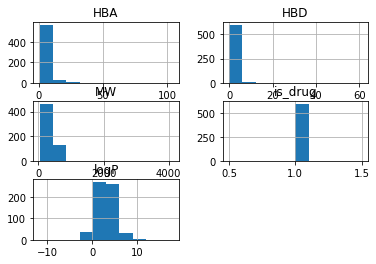

In [13]:
drug_df.hist()

In [14]:
#drug_df.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000223F5ECA850>,
      dtype=object)

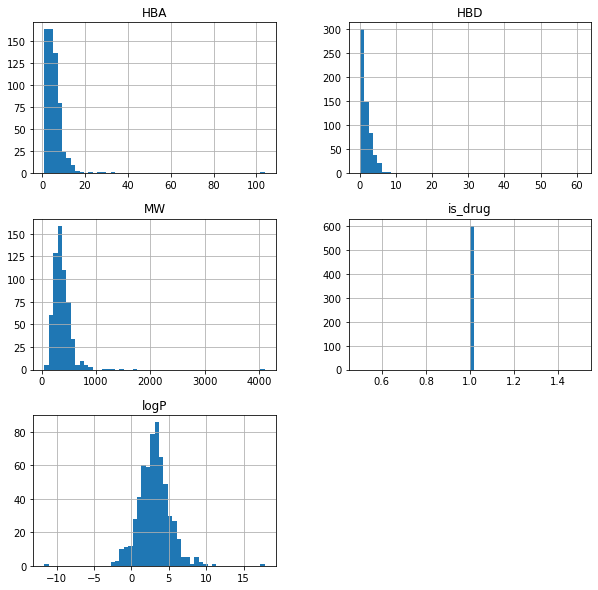

In [15]:
drug_df.hist(figsize =(10,10), bins = 50)

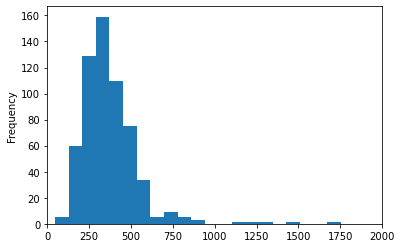

In [16]:
# xlim 사용(x축 자르기)
#grid = False, True

drug_df["MW"].plot.hist(bins=50, xlim=(0,2000))

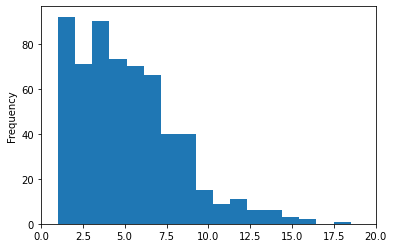

In [17]:
drug_df["HBA"].plot.hist(bins=100, xlim=(0,20))

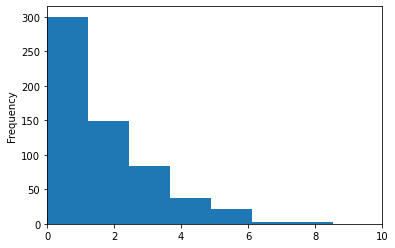

In [18]:
drug_df["HBD"].plot.hist(bins=50, xlim=(0,10))

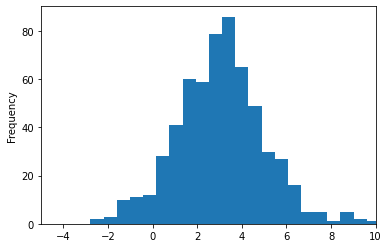

In [19]:
drug_df["logP"].plot.hist(bins=50, xlim=(-5,10))

In [20]:
drug_df.describe()

,MW,HBA,HBD,logP,is_drug
count,600.000000,600.000000,600.000000,600.000000,600.0
mean,373.048343,5.848333,1.871667,3.061503,1.0
std,225.018410,5.333799,2.967582,2.139073,0.0
min,46.041865,1.000000,0.000000,-11.627860,1.0
25%,263.188529,3.000000,1.000000,1.785350,1.0
50%,339.194677,5.000000,1.500000,3.073600,1.0
75%,443.416526,7.000000,3.000000,4.219398,1.0
max,4111.115377,104.000000,61.000000,17.853900,1.0


In [21]:
non_drugs = []

with open("non_drugs.smi") as fp:
    for l in fp:
        smiles = l.strip()
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            non_drugs.append(mol)

In [22]:
len(non_drugs)

999

In [23]:
#딕셔너리 만들기
property = {"MW": [],"HBA":[], "HBD":[], "logP":[],"is_drug":[]}

for mol in non_drugs:
    mw = CalcExactMolWt(mol)
    property["MW"].append(mw)
    
    hba = CalcNumLipinskiHBA(mol)
    property["HBA"].append(hba)
    
    hbd = CalcNumLipinskiHBD(mol)
    property["HBD"].append(hbd)
    
    logp, mr = CalcCrippenDescriptors(mol)
    property["logP"].append(logp)
    
    property["is_drug"].append(0)
    

In [24]:
non_drug_df = pd.DataFrame(property)

In [25]:
non_drug_df

,MW,HBA,HBD,logP,is_drug
0,240.220164,3,1,1.87700,0
1,281.156183,4,2,2.59610,0
2,302.073452,4,2,3.52380,0
3,282.255880,2,0,5.66270,0
4,291.231063,4,1,2.20530,0
...,...,...,...,...,...
994,674.298346,11,6,5.12654,0
995,437.004489,7,2,4.10954,0
996,375.100414,5,1,3.70520,0
997,1250.664991,14,0,19.16620,0


In [27]:
new_df = pd.concat([drug_df, non_drug_df])

In [28]:
new_df

,MW,HBA,HBD,logP,is_drug
0,315.000724,4,1,2.63360,1
1,171.104799,1,1,1.89670,1
2,1343.587801,27,15,0.92454,1
3,211.110947,3,1,1.80390,1
4,204.072119,2,0,2.14610,1
...,...,...,...,...,...
994,674.298346,11,6,5.12654,0
995,437.004489,7,2,4.10954,0
996,375.100414,5,1,3.70520,0
997,1250.664991,14,0,19.16620,0


In [29]:
# 데이터 준비가 끝났다.

In [30]:
X = new_df.iloc[:,:-1]

In [31]:
X

,MW,HBA,HBD,logP
0,315.000724,4,1,2.63360
1,171.104799,1,1,1.89670
2,1343.587801,27,15,0.92454
3,211.110947,3,1,1.80390
4,204.072119,2,0,2.14610
...,...,...,...,...
994,674.298346,11,6,5.12654
995,437.004489,7,2,4.10954
996,375.100414,5,1,3.70520
997,1250.664991,14,0,19.16620


In [32]:
y = new_df.iloc[:, -1]

In [33]:
y

0      1
1      1
2      1
3      1
4      1
      ..
994    0
995    0
996    0
997    0
998    0
Name: is_drug, Length: 1599, dtype: int64

In [34]:
# training set 과  test set 분리

In [35]:
import sklearn.model_selection

In [38]:
X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
X_train

,MW,HBA,HBD,logP
493,305.073805,1,1,5.17960
354,208.121178,4,0,1.16180
342,247.062677,7,0,0.53442
234,182.087769,2,1,2.13759
105,243.121906,7,3,-1.60240
...,...,...,...,...
530,227.040485,2,0,4.07010
694,449.117411,6,2,4.06930
260,351.158292,6,0,3.07648
859,422.151158,8,2,3.04150


In [42]:
X_test

,MW,HBA,HBD,logP
203,338.016057,8,5,-0.12410
124,430.061041,6,2,2.87958
350,170.105528,4,2,-0.12730
82,236.928676,3,0,1.44860
726,453.196459,6,2,1.36610
...,...,...,...,...
659,207.071785,2,1,2.77300
695,224.096106,4,2,1.23960
555,315.183444,4,2,3.33830
363,435.005545,4,1,4.02260


In [43]:
y_test

203    0
124    1
350    1
82     0
726    0
      ..
659    0
695    0
555    0
363    0
104    0
Name: is_drug, Length: 320, dtype: int64

In [44]:
## RandomForest 모델 사용

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
my_model = RandomForestClassifier()

In [48]:
# my_model 학습

In [49]:
my_model.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
# 예측 시켜보기

In [54]:
y_pred = my_model.predict(X_test)

In [59]:
# 채점

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

# precision_score 정확도
# recall_score 
# f1_score

In [64]:
precision_score(y_test, y_pred)

0.5862068965517241

In [65]:
recall_score(y_test, y_pred)

0.3953488372093023

In [66]:
f1_score(y_test, y_pred)

0.4722222222222222